# Web Crawling 


Se realiza el crawling con beautiful soup para las pagínas de cursos GCFGlobal:
* https://edu.gcfglobal.org/en/topics/
* https://edu.gcfglobal.org/pt/topics/
* https://edu.gcfglobal.org/es/topics/


## Crawler

In [186]:
import requests # libreria HTTP
import time
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns # graficar 
import matplotlib.pyplot as plt



In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
!ls drive

MyDrive  Othercomputers


In [191]:
# Extracción de URLs y Temática de los cursos.
root = 'https://edu.gcfglobal.org'
urls = ['https://edu.gcfglobal.org/es/topics/',
          'https://edu.gcfglobal.org/en/topics/',
           'https://edu.gcfglobal.org/pt/topics/']
all_link = []
temas =[]
for i in urls: # para recorrer las url de diferentes idiomas
  html_text = requests.get(i).text
  soup = BeautifulSoup(html_text,'html.parser') # HTML parser es una clase de Html parser
  colecciones = soup.find_all('li', class_='supercollection all-topics') # temas principales
  for coleccion in colecciones: # para recorrer el tema
    tema= coleccion.find('a', class_='all-topics-subject-link').text # encuentra el primero
    cursos = coleccion.find_all('a', class_='all-topics-tutorial-link') # links de los cursos.
    for link in cursos: # para recorrer los links de los cursos
      if('https' not in link.get('href')):
        linktest = root + link.get('href')
      else:
        linktest = link.get('href')
      temas.append(tema)
      all_link.append(linktest)
      print(linktest, tema)
      time.sleep(0.25)
          #print("The size of the pages is: ", len(all_link))

https://edu.gcfglobal.org/es/informatica-basica/ Informática básica
https://edu.gcfglobal.org/es/informatica-avanzada/ Informática básica
https://edu.gcfglobal.org/es/como-imprimir/ Informática básica
https://edu.gcfglobal.org/es/virus-informaticos-y-antivirus/ Informática básica
https://edu.gcfglobal.org/es/curso-basico-de-html/ Informática básica
https://edu.gcfglobal.org/es/procesadores-de-texto/ Ofimática
https://edu.gcfglobal.org/es/presentaciones-basicas/ Ofimática
https://edu.gcfglobal.org/es/programas-de-hojas-de-calculo/ Ofimática
https://edu.gcfglobal.org/es/google-drive/ Ofimática
https://edu.gcfglobal.org/es/google-slides/ Ofimática
https://edu.gcfglobal.org/es/google-docs/ Ofimática
https://edu.gcfglobal.org/es/google-meet/ Ofimática
https://edu.gcfglobal.org/es/como-usar-internet/ Internet
https://edu.gcfglobal.org/es/seguridad-en-internet/ Internet
https://edu.gcfglobal.org/es/crear-un-blog-en-internet/ Internet
https://edu.gcfglobal.org/es/creacion-de-sitios-web/ Intern

In [150]:
len(all_link), len(temas)

(487, 487)

In [151]:
all_link[1], temas[1]

('https://edu.gcfglobal.org/es/informatica-avanzada/', 'Informática básica')

In [152]:
# Extracción de la info del curso cuando el link es diferente al root
def get_course_link(link):
  r = requests.get(link)
  soup = BeautifulSoup(r.text,'html.parser')
  course_header1 = soup.find('div', class_= 'sub-header')
  info={}
  if course_header1:
    info['titulo'] = course_header1.find('h1').text.replace('\n', '')
    info['descripcion'] = course_header1.find('p').text.replace('\n', '')
    anchor_link = course_header1.find_all('a')
    for a in anchor_link:
      if('https' not in a.get('href')):
        info['inicio_curso'] = 'https://idiomas.gcfglobal.org' + a.get('href')
      # else:
      #   print(f"Header different!: {link}" )
  else: 
    print(f"Header different!: {link}" )
  return info

In [153]:
get_course_link('https://edu.gcfglobal.org/en/basicspanishskills/')

{'titulo': 'Basic Spanish Skills',
 'descripcion': 'This free tutorial covers some of the most common Spanish greetings and phrases.'}

In [154]:
def get_course_info(link):
    info = {}
    r = requests.get(link)
    if r.status_code == 200:
        soup = BeautifulSoup(r.text,'html.parser')
        course_header = soup.find('div', class_= 'header-desc')
        if course_header:
            info['titulo'] = course_header.find('h1').text
            desc = course_header.find('div', class_= 'description')
            parrafos = desc.find_all('p')
            anchor_link = course_header.find_all('a')
            desc_text = ""
            for parrafo in parrafos:
                desc_text += parrafo.text + "\n"
            info['descripcion'] = desc_text[:-1]
            for a in anchor_link:
              if('https' not in a.get('href')):
                info['inicio_curso'] = root + a.get('href')
              else: 
                info['videos_youtube']  = a.get('href')
        else:
              info = get_course_link(link)
              print(f"Header different!: {link}")             
    else:
        print(f"Connection failed to {link}")
    return info

In [155]:
get_course_info('https://edu.gcfglobal.org/en/basicspanishskills/')


{'titulo': 'Basic Spanish Skills',
 'descripcion': 'This free tutorial covers some of the most common Spanish greetings and phrases.'}

In [156]:
get_course_link('https://edu.gcfglobal.org/en/basicspanishskills/')

{'titulo': 'Basic Spanish Skills',
 'descripcion': 'This free tutorial covers some of the most common Spanish greetings and phrases.'}

In [157]:
def get_course_lesson(link):
  info={}
  r = requests.get(link)
  if r.status_code == 200:
    soup = BeautifulSoup(r.text,'html.parser')
    course_lesson = soup.find('div', class_= 'collection-content')
    course_lesson1 = soup.find('div', class_= 'tutorial-info')
    if course_lesson:
      lessons = course_lesson.find_all('h3')
      texto = ""
      for l in lessons:
        texto += l.text + ","
        info['lecciones']= texto[:-1]
    elif course_lesson1:
      print(f"lesson not found {link}")
      lessons = course_lesson1.find_all('p')
      texto1 = ""
      for l1 in lessons:
        texto1 += l1.text + ","
        info['lecciones']= texto1[:-1].replace('\n', '')
  else:
    print(f"Connection failed to {link}")
  return info

In [158]:
get_course_lesson('https://edu.gcfglobal.org/en/basicspanishskills/')

{'lecciones': 'Basic Conversation Skills,Using Spanish in Real Life'}

In [159]:
all_courses_info = []

for link in all_link:
    course_info = get_course_info(link)
    all_courses_info.append(course_info)
    print(course_info)
    time.sleep(0.5)


{'titulo': 'Informática Básica', 'descripcion': 'Aprende cómo empezar a usar un computador desde el principio, cuáles son sus partes, cómo conectarlo e instalar programas.', 'inicio_curso': 'https://edu.gcfglobal.org/es/informatica-basica/que-es-un-computador/1/', 'videos_youtube': 'https://www.youtube.com/playlist?list=PLQVIjL9XTrQ0grV_RVr8Fw2LxYNHc-jVt'}
{'titulo': 'Conceptos básicos de programación', 'descripcion': 'Aprende los principios y conceptos de la programación. Conoce todo sobre los lenguajes de programación y comprende cómo se desarrollan los sistemas informáticos.', 'inicio_curso': 'https://edu.gcfglobal.org/es/conceptos-basicos-de-programacion/que-es-programar/1/', 'videos_youtube': 'https://www.youtube.com/watch?v=3F-kuNGlNco&list=PLQVIjL9XTrQ1ANovnlN8WbHp-YxWdzKYK'}
{'titulo': '¿Cómo imprimir?', 'descripcion': 'Aprende los pasos básicos para imprimir desde tu computador un documento, foto, página web o correo electrónico. Además, te enseñamos la forma más sencilla de i

In [160]:
dataGCF = pd.DataFrame.from_dict(all_courses_info)
dataGCF['URL'] = all_link
dataGCF['tema'] = temas
dataGCF

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema
0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica
1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica
2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,NaN,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica
3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,NaN,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica
4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,NaN,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica
...,...,...,...,...,...,...
482,a2. Básico,Aprenda a expressar todas as suas idéias em in...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/a2/,Inglês
483,b1. Intermediário,"Aprenda a usar corretamente os conectivos, ver...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/b1/,Inglês
484,b2. Intermediário avançado,"Aqui você verá temas como voz passiva e ativa,...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/b2/,Inglês
485,c1. Avançado,"Neste nível avançado do curso, você já poderá ...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/c1/,Inglês


In [161]:
all_courses_lesson = []
for link in all_link:
    course_lesson = get_course_lesson(link)
    all_courses_lesson.append(course_lesson)
    print(course_lesson)
    time.sleep(0.5) # espera de 500 ms en cada iteración

{'lecciones': 'Cómo usar un computador,Explora Windows,Explora Mac OS X,Las partes básicas de un computador,Sistemas operativos,Computadores Portátiles,Otros tipos de dispositivos,Dispositivos móviles,Otros Conceptos'}
{'lecciones': '¿Qué es la programación?,Sistema binario,Códigos numéricos,Tipos de datos y operadores,Algoritmos,Diagramas de flujo,Lenguajes de programación'}
{'lecciones': '¿Qué necesitas para imprimir?,¿Cómo imprimir un archivo?,¿Cómo imprimir desde un teléfono móvil?'}
{'lecciones': 'Los virus informaticos,Los antivirus'}
{'lecciones': '¿Cómo empezar?,Escribe en HTML,Extras'}
{'lecciones': 'Opciones básicas de texto,Función Insertar'}
{'lecciones': 'Presentación básica'}
{'lecciones': 'Composición de una hoja de cálculo,Fórmulas y funciones en libros de cálculo'}
{'lecciones': 'Introducción a Google Drive, Gestión de archivos y carpetas en Google Drive, Google Drive en dispositivos,Test'}
{'lecciones': 'Introducción a Google Slides,Temas y plantillas ,Herramientas bá

In [162]:
dataGCF1 = pd.DataFrame.from_dict(all_courses_lesson)
dataGCF1

,lecciones
0,"Cómo usar un computador,Explora Windows,Explor..."
1,"¿Qué es la programación?,Sistema binario,Códig..."
2,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,"Los virus informaticos,Los antivirus"
4,"¿Cómo empezar?,Escribe en HTML,Extras"
...,...
482,"Advérbios de lugar em inglêsarrow_forward_ios,..."
483,O que é preposição de tempo em inglês?arrow_fo...
484,"Before and Afterarrow_forward_ios,Aprenda a di..."
485,"English language examsarrow_forward_ios,Você t..."


In [163]:
dataGCFJoin = pd.concat([dataGCF,dataGCF1],axis=1) 
dataGCFJoin.head()

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,NaN,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,NaN,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,NaN,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"


In [179]:
# guardar en un csv
#Información GCF
dataGCFJoin.to_csv('drive/MyDrive/Laboratorios SW/Datos pagina/datosGCFraw.csv', sep=',', encoding='utf-8')  
dataGCFJoin.to_excel('drive/MyDrive/Laboratorios SW/Datos pagina/datosGCFrawpreuba.xlsx', index=True)
     


In [183]:
pd.read_csv('drive/MyDrive/Laboratorios SW/Datos pagina/datosGCFraw.csv')

,Unnamed: 0,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,NaN,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,NaN,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,NaN,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"
...,...,...,...,...,...,...,...,...
482,482,a2. Básico,Aprenda a expressar todas as suas idéias em in...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/a2/,Inglês,"Advérbios de lugar em inglêsarrow_forward_ios,..."
483,483,b1. Intermediário,"Aprenda a usar corretamente os conectivos, ver...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/b1/,Inglês,O que é preposição de tempo em inglês?arrow_fo...
484,484,b2. Intermediário avançado,"Aqui você verá temas como voz passiva e ativa,...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/b2/,Inglês,"Before and Afterarrow_forward_ios,Aprenda a di..."
485,485,c1. Avançado,"Neste nível avançado do curso, você já poderá ...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/c1/,Inglês,"English language examsarrow_forward_ios,Você t..."


## Limpieza del Dataset

In [165]:
dataGCFJoin.head(10)

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,NaN,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,NaN,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,NaN,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"
5,Procesadores de texto,Aquí aprenderás sobre las herramientas básicas...,https://edu.gcfglobal.org/es/procesadores-de-t...,NaN,https://edu.gcfglobal.org/es/procesadores-de-t...,Ofimática,"Opciones básicas de texto,Función Insertar"
6,Presentaciones básicas,En este curso aprenderás a crear presentacione...,https://edu.gcfglobal.org/es/presentaciones-ba...,https://www.youtube.com/watch?v=YMzDHZmCncQ&li...,https://edu.gcfglobal.org/es/presentaciones-ba...,Ofimática,Presentación básica
7,Programas de hojas de cálculo,Conoce cuáles son las herramientas básicas al ...,https://edu.gcfglobal.org/es/programas-de-hoja...,https://www.youtube.com/watch?v=ZBkkrnD7GBo&li...,https://edu.gcfglobal.org/es/programas-de-hoja...,Ofimática,"Composición de una hoja de cálculo,Fórmulas y ..."
8,Google Drive,Aprende en este curso gratuito de Google Drive...,https://edu.gcfglobal.org/es/google-drive/que-...,NaN,https://edu.gcfglobal.org/es/google-drive/,Ofimática,"Introducción a Google Drive, Gestión de archiv..."
9,Google Slides,En este curso te enseñaremos a usar este progr...,https://edu.gcfglobal.org/es/google-slides/goo...,NaN,https://edu.gcfglobal.org/es/google-slides/,Ofimática,"Introducción a Google Slides,Temas y plantilla..."


In [166]:
df = dataGCFJoin.copy()
df.head(10)

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,NaN,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,NaN,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,NaN,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"
5,Procesadores de texto,Aquí aprenderás sobre las herramientas básicas...,https://edu.gcfglobal.org/es/procesadores-de-t...,NaN,https://edu.gcfglobal.org/es/procesadores-de-t...,Ofimática,"Opciones básicas de texto,Función Insertar"
6,Presentaciones básicas,En este curso aprenderás a crear presentacione...,https://edu.gcfglobal.org/es/presentaciones-ba...,https://www.youtube.com/watch?v=YMzDHZmCncQ&li...,https://edu.gcfglobal.org/es/presentaciones-ba...,Ofimática,Presentación básica
7,Programas de hojas de cálculo,Conoce cuáles son las herramientas básicas al ...,https://edu.gcfglobal.org/es/programas-de-hoja...,https://www.youtube.com/watch?v=ZBkkrnD7GBo&li...,https://edu.gcfglobal.org/es/programas-de-hoja...,Ofimática,"Composición de una hoja de cálculo,Fórmulas y ..."
8,Google Drive,Aprende en este curso gratuito de Google Drive...,https://edu.gcfglobal.org/es/google-drive/que-...,NaN,https://edu.gcfglobal.org/es/google-drive/,Ofimática,"Introducción a Google Drive, Gestión de archiv..."
9,Google Slides,En este curso te enseñaremos a usar este progr...,https://edu.gcfglobal.org/es/google-slides/goo...,NaN,https://edu.gcfglobal.org/es/google-slides/,Ofimática,"Introducción a Google Slides,Temas y plantilla..."


In [168]:
df.isnull().sum()
# titulo              6
# inicio_curso      302
# descripcion         6
# videos_youtube    277
# URL                 0
# tema                0
# lecciones          78

titulo              6
descripcion         6
inicio_curso      302
videos_youtube    278
URL                 0
tema                0
lecciones          78
dtype: int64

In [170]:
#Localiza los nulos, en este caso se eliminan las URL caidas y las que contengan nan en las caracteristicas minimas evaluadas
df.loc[(df['titulo'].isnull()) | (df['descripcion'].isnull())]
df.drop(df[df['titulo'].isnull()].index, inplace =True)
df

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,NaN,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,NaN,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,NaN,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"
...,...,...,...,...,...,...,...
481,a1. Iniciante,Neste nível você conhecerá o alfabeto básico p...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/a1/,Inglês,"O alfabeto em inglêsarrow_forward_ios,Aqui voc..."
482,a2. Básico,Aprenda a expressar todas as suas idéias em in...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/a2/,Inglês,"Advérbios de lugar em inglêsarrow_forward_ios,..."
483,b1. Intermediário,"Aprenda a usar corretamente os conectivos, ver...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/b1/,Inglês,O que é preposição de tempo em inglês?arrow_fo...
484,b2. Intermediário avançado,"Aqui você verá temas como voz passiva e ativa,...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,NaN,https://idiomas.gcfglobal.org/pt/curso/ingles/b2/,Inglês,"Before and Afterarrow_forward_ios,Aprenda a di..."


In [171]:
# URL que no posean el link de inicio_curso y videos_youtube  son 168  y se reemplazan por cero
df.loc[(df['inicio_curso'].isnull()) & (df['videos_youtube'].isnull())]
df['inicio_curso'].fillna(0, inplace= True)
df['videos_youtube'].fillna(0, inplace= True)
df

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,0,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,0,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,0,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"
...,...,...,...,...,...,...,...
481,a1. Iniciante,Neste nível você conhecerá o alfabeto básico p...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/a1/,Inglês,"O alfabeto em inglêsarrow_forward_ios,Aqui voc..."
482,a2. Básico,Aprenda a expressar todas as suas idéias em in...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/a2/,Inglês,"Advérbios de lugar em inglêsarrow_forward_ios,..."
483,b1. Intermediário,"Aprenda a usar corretamente os conectivos, ver...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/b1/,Inglês,O que é preposição de tempo em inglês?arrow_fo...
484,b2. Intermediário avançado,"Aqui você verá temas como voz passiva e ativa,...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/b2/,Inglês,"Before and Afterarrow_forward_ios,Aprenda a di..."


In [172]:
df.isnull().sum()

titulo             0
descripcion        0
inicio_curso       0
videos_youtube     0
URL                0
tema               0
lecciones         73
dtype: int64

In [173]:
df.loc[df['lecciones'].isnull()]
df['lecciones'].fillna(0, inplace= True)

In [174]:
df.isnull().sum()

titulo            0
descripcion       0
inicio_curso      0
videos_youtube    0
URL               0
tema              0
lecciones         0
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 485
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   titulo          481 non-null    object
 1   descripcion     481 non-null    object
 2   inicio_curso    481 non-null    object
 3   videos_youtube  481 non-null    object
 4   URL             481 non-null    object
 5   tema            481 non-null    object
 6   lecciones       481 non-null    object
dtypes: object(7)
memory usage: 46.2+ KB


In [176]:
# estadisticas
df.describe()

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
count,481,481,481,481,481,481,481
unique,377,404,186,155,407,90,343
top,Word 2016,"In this free tutorial, learn how to use this M...",0,0,https://edu.gcfglobal.org/en/techsavvy/,Internet,0
freq,4,4,296,272,3,24,73


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


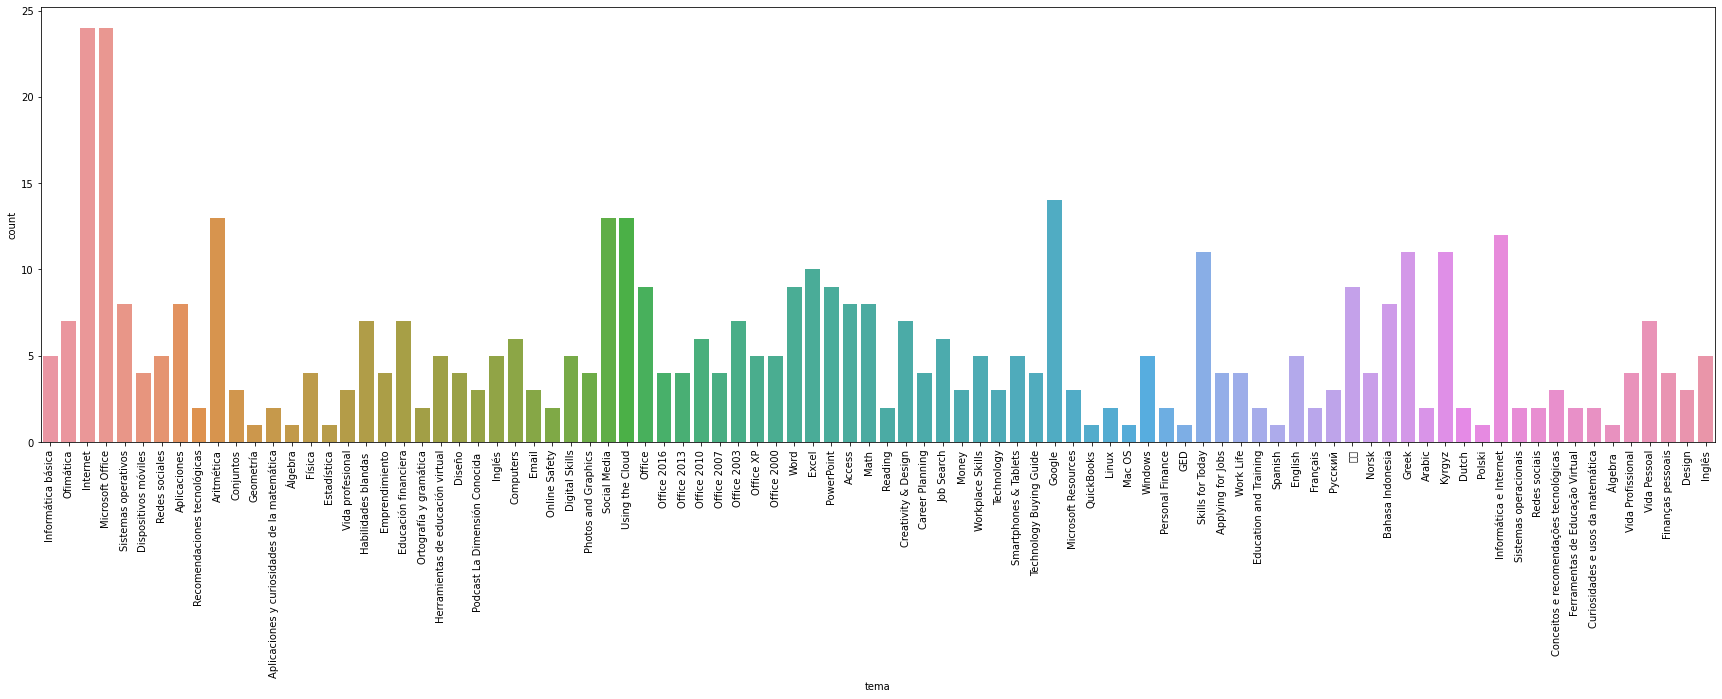

In [190]:
# conteo de los curso por tematica
plt.figure(figsize = (30,8))
ax = sns.countplot(x ='tema', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [177]:
df.head(50)

,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,0,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,0,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,0,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"
5,Procesadores de texto,Aquí aprenderás sobre las herramientas básicas...,https://edu.gcfglobal.org/es/procesadores-de-t...,0,https://edu.gcfglobal.org/es/procesadores-de-t...,Ofimática,"Opciones básicas de texto,Función Insertar"
6,Presentaciones básicas,En este curso aprenderás a crear presentacione...,https://edu.gcfglobal.org/es/presentaciones-ba...,https://www.youtube.com/watch?v=YMzDHZmCncQ&li...,https://edu.gcfglobal.org/es/presentaciones-ba...,Ofimática,Presentación básica
7,Programas de hojas de cálculo,Conoce cuáles son las herramientas básicas al ...,https://edu.gcfglobal.org/es/programas-de-hoja...,https://www.youtube.com/watch?v=ZBkkrnD7GBo&li...,https://edu.gcfglobal.org/es/programas-de-hoja...,Ofimática,"Composición de una hoja de cálculo,Fórmulas y ..."
8,Google Drive,Aprende en este curso gratuito de Google Drive...,https://edu.gcfglobal.org/es/google-drive/que-...,0,https://edu.gcfglobal.org/es/google-drive/,Ofimática,"Introducción a Google Drive, Gestión de archiv..."
9,Google Slides,En este curso te enseñaremos a usar este progr...,https://edu.gcfglobal.org/es/google-slides/goo...,0,https://edu.gcfglobal.org/es/google-slides/,Ofimática,"Introducción a Google Slides,Temas y plantilla..."


In [184]:
pd.read_csv('drive/MyDrive/Laboratorios SW/Datos pagina/datosGCFDepurado.csv')

,Unnamed: 0,titulo,descripcion,inicio_curso,videos_youtube,URL,tema,lecciones
0,0,Informática Básica,Aprende cómo empezar a usar un computador desd...,https://edu.gcfglobal.org/es/informatica-basic...,https://www.youtube.com/playlist?list=PLQVIjL9...,https://edu.gcfglobal.org/es/informatica-basica/,Informática básica,"Cómo usar un computador,Explora Windows,Explor..."
1,1,Conceptos básicos de programación,Aprende los principios y conceptos de la progr...,https://edu.gcfglobal.org/es/conceptos-basicos...,https://www.youtube.com/watch?v=3F-kuNGlNco&li...,https://edu.gcfglobal.org/es/informatica-avanz...,Informática básica,"¿Qué es la programación?,Sistema binario,Códig..."
2,2,¿Cómo imprimir?,Aprende los pasos básicos para imprimir desde ...,https://edu.gcfglobal.org/es/como-imprimir/com...,0,https://edu.gcfglobal.org/es/como-imprimir/,Informática básica,"¿Qué necesitas para imprimir?,¿Cómo imprimir u..."
3,3,Virus informáticos y antivirus,En este curso verás qué son son los virus info...,https://edu.gcfglobal.org/es/virus-informatico...,0,https://edu.gcfglobal.org/es/virus-informatico...,Informática básica,"Los virus informaticos,Los antivirus"
4,4,Curso básico de HTML,"Aprende los conceptos básicos del HTML, un len...",https://edu.gcfglobal.org/es/curso-basico-de-h...,0,https://edu.gcfglobal.org/es/curso-basico-de-h...,Informática básica,"¿Cómo empezar?,Escribe en HTML,Extras"
...,...,...,...,...,...,...,...,...
476,481,a1. Iniciante,Neste nível você conhecerá o alfabeto básico p...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/a1/,Inglês,"O alfabeto em inglêsarrow_forward_ios,Aqui voc..."
477,482,a2. Básico,Aprenda a expressar todas as suas idéias em in...,https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/a2/,Inglês,"Advérbios de lugar em inglêsarrow_forward_ios,..."
478,483,b1. Intermediário,"Aprenda a usar corretamente os conectivos, ver...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/b1/,Inglês,O que é preposição de tempo em inglês?arrow_fo...
479,484,b2. Intermediário avançado,"Aqui você verá temas como voz passiva e ativa,...",https://idiomas.gcfglobal.org/pt/curso/ingles/...,0,https://idiomas.gcfglobal.org/pt/curso/ingles/b2/,Inglês,"Before and Afterarrow_forward_ios,Aprenda a di..."


In [180]:
# Base de datos depurada
df.to_csv('drive/MyDrive/Laboratorios SW/Datos pagina/datosGCFDepurado.csv', sep=',', encoding='utf-8')
dataGCFJoin.to_excel('drive/MyDrive/Laboratorios SW/Datos pagina/datosGCFDepreuba.xlsx', index=True)